In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 建議在 Notebook 開頭設定風格（簡單論文風）
plt.style.use("default")  # 簡單白底
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

df = pd.read_csv("yearly_clean.tsv", sep="\t")

# 確保 year 是 int
df["year"] = df["year"].astype(int)

# 計算每年的總 count，做 normalized popularity
year_totals = df.groupby("year")["count"].sum().rename("total_year_count")
df = df.merge(year_totals, on="year")
df["popularity"] = df["count"] / df["total_year_count"]

df.head()


,year,tag,count,total_views,total_score,total_answers,avg_views,avg_score,avg_answers,total_year_count,popularity
0,2008,2d,41,710864,619,219,17338.146341,15.097561,5.341463,148054,0.000277
1,2008,active-directory,140,2556787,1713,444,18262.764286,12.235714,3.171429,148054,0.000946
2,2008,anonymous-methods,13,389753,694,76,29981.000000,53.384615,5.846154,148054,0.000088
3,2008,apache,375,8287457,7837,1551,22099.885333,20.898667,4.136000,148054,0.002533
4,2008,arguments,25,6267228,7326,251,250689.120000,293.040000,10.040000,148054,0.000169


In [3]:
from typing import List

def plot_tag_trends(data: pd.DataFrame, tags: List[str], title: str):
    """畫出指定 tags 的 normalized popularity 趨勢。"""
    subset = data[data["tag"].isin(tags)].copy()
    # 避免沒資料時什麼都畫不出來
    if subset.empty:
        print("No data for tags:", tags)
        return
    
    pivot = subset.pivot(index="year", columns="tag", values="popularity").fillna(0)
    
    ax = pivot.plot(marker="o")
    ax.set_title(title)
    ax.set_xlabel("Year")
    ax.set_ylabel("Normalized popularity")
    ax.legend(title="Tag")
    plt.tight_layout()
    plt.show()


def summarize_tags(data: pd.DataFrame, tags: List[str]) -> pd.DataFrame:
    """
    對指定 tags 計算關鍵指標：
    - first_year / last_year
    - popularity_first / popularity_last
    - change (last - first)
    - relative_change (%)
    - peak_year / peak_popularity
    """
    records = []
    for t in tags:
        sub = data[data["tag"] == t].sort_values("year")
        if sub.empty:
            continue
        
        first_year = sub["year"].iloc[0]
        last_year = sub["year"].iloc[-1]
        pop_first = sub["popularity"].iloc[0]
        pop_last = sub["popularity"].iloc[-1]
        change = pop_last - pop_first
        rel_change = (change / pop_first * 100) if pop_first > 0 else None
        
        peak_idx = sub["popularity"].idxmax()
        peak_year = int(sub.loc[peak_idx, "year"])
        peak_pop = float(sub.loc[peak_idx, "popularity"])
        
        records.append({
            "tag": t,
            "first_year": int(first_year),
            "last_year": int(last_year),
            "popularity_first": pop_first,
            "popularity_last": pop_last,
            "absolute_change": change,
            "relative_change_%": rel_change,
            "peak_year": peak_year,
            "peak_popularity": peak_pop,
        })
    
    return pd.DataFrame(records).sort_values("absolute_change", ascending=False)


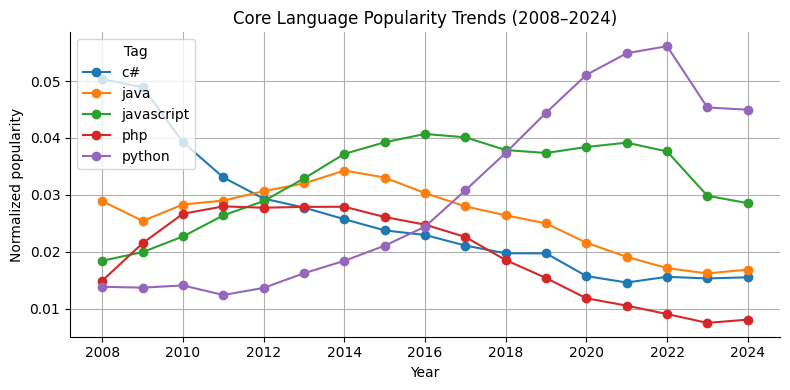

,tag,first_year,last_year,popularity_first,popularity_last,absolute_change,relative_change_%,peak_year,peak_popularity
0,python,2008,2024,0.013826,0.044972,0.031146,225.273748,2022,0.056148
2,javascript,2008,2024,0.018399,0.028535,0.010136,55.091997,2016,0.040707
3,php,2008,2024,0.014900,0.008047,-0.006853,-45.994389,2011,0.027967
1,java,2008,2024,0.028895,0.016851,-0.012044,-41.682864,2014,0.034273
4,c#,2008,2024,0.050360,0.015490,-0.034870,-69.241676,2008,0.050360


In [4]:
core_lang_tags = ["python", "java", "javascript", "php", "c#"]

plot_tag_trends(
    data=df,
    tags=core_lang_tags,
    title="Core Language Popularity Trends (2008–2024)"
)

summary_core = summarize_tags(df, core_lang_tags)
summary_core


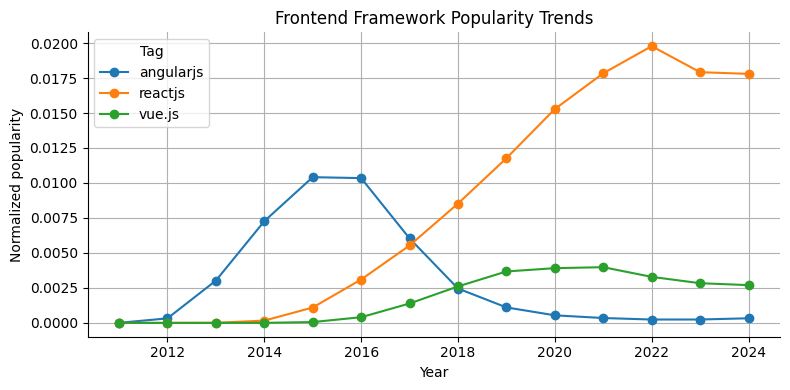

,tag,first_year,last_year,popularity_first,popularity_last,absolute_change,relative_change_%,peak_year,peak_popularity
0,reactjs,2013,2024,0.000008,0.017796,0.017788,210626.402980,2022,0.019777
2,vue.js,2014,2024,0.000003,0.002699,0.002696,94251.448344,2021,0.003981
1,angularjs,2011,2024,0.000004,0.000329,0.000325,9195.204308,2015,0.010414


In [5]:
frontend_tags = ["reactjs", "angularjs", "vue.js"]

plot_tag_trends(
    data=df,
    tags=frontend_tags,
    title="Frontend Framework Popularity Trends"
)

summary_frontend = summarize_tags(df, frontend_tags)
summary_frontend


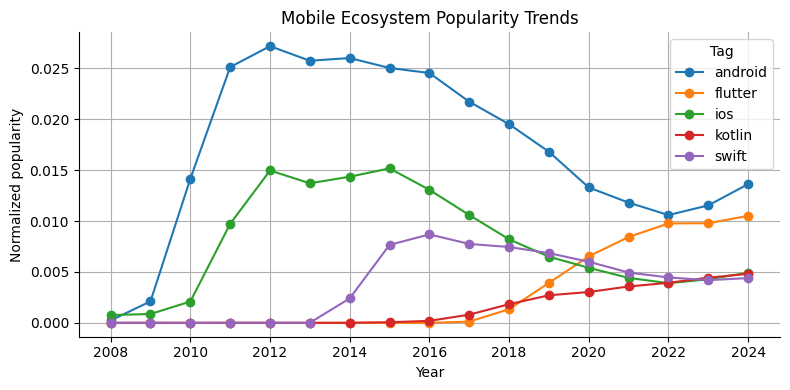

,tag,first_year,last_year,popularity_first,popularity_last,absolute_change,relative_change_%,peak_year,peak_popularity
0,android,2008,2024,0.000243,0.013623,0.013379,5502.438490,2012,0.027168
4,flutter,2016,2024,0.000004,0.010510,0.010506,251871.421659,2024,0.010510
2,kotlin,2011,2024,0.000004,0.004817,0.004813,125531.511367,2024,0.004817
3,swift,2009,2024,0.000017,0.004398,0.004381,25715.200953,2016,0.008685
1,ios,2008,2024,0.000770,0.004929,0.004159,540.142280,2015,0.015167


In [6]:
mobile_tags = ["android", "ios", "kotlin", "swift", "flutter"]

plot_tag_trends(
    data=df,
    tags=mobile_tags,
    title="Mobile Ecosystem Popularity Trends"
)

summary_mobile = summarize_tags(df, mobile_tags)
summary_mobile


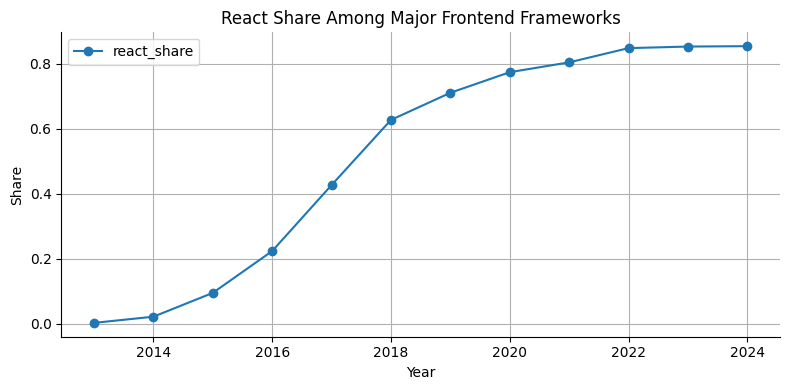

,year,react_share
9,2020,0.774464
10,2021,0.804749
11,2022,0.848564
12,2023,0.853410
13,2024,0.854591


In [7]:
def compute_ratio(data: pd.DataFrame, numerator_tags, denominator_tags, name: str):
    num = data[data["tag"].isin(numerator_tags)].groupby("year")["count"].sum()
    den = data[data["tag"].isin(denominator_tags)].groupby("year")["count"].sum()
    ratio = (num / den).rename(name)
    return ratio.reset_index()

# 例：React / (React + AngularJS + Vue)
ratio_frontend = compute_ratio(
    df,
    numerator_tags=["reactjs"],
    denominator_tags=["reactjs", "angularjs", "vue.js"],
    name="react_share"
)

ax = ratio_frontend.plot(x="year", y="react_share", marker="o")
ax.set_title("React Share Among Major Frontend Frameworks")
ax.set_xlabel("Year")
ax.set_ylabel("Share")
plt.tight_layout()
plt.show()

ratio_frontend.tail()
